In [ ]:
import numpy as np
from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import configparser
import sys
import os
import matplotlib.animation as animation
import pstats

mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

# Análisis de performance del algoritmo genético

Se estudian los tiempos de ejecución del algoritmo. Como lo que nos interesa son los tiempos de cómputo de cada función, no hace falta hacer muchas iteraciones. Es decir, no buscamos encontrar el valor óptimo. Se anulan las condiciones de saturación y tolerancia así no corta si encuentra un buen valor.

Se realizan 8 generaciones para tamaños: 8,16,32,64 y 128.

['n8_profiling_001', 'n16_profiling_001', 'n32_profiling_001', 'n64_profiling_001', 'n128_profiling_001']


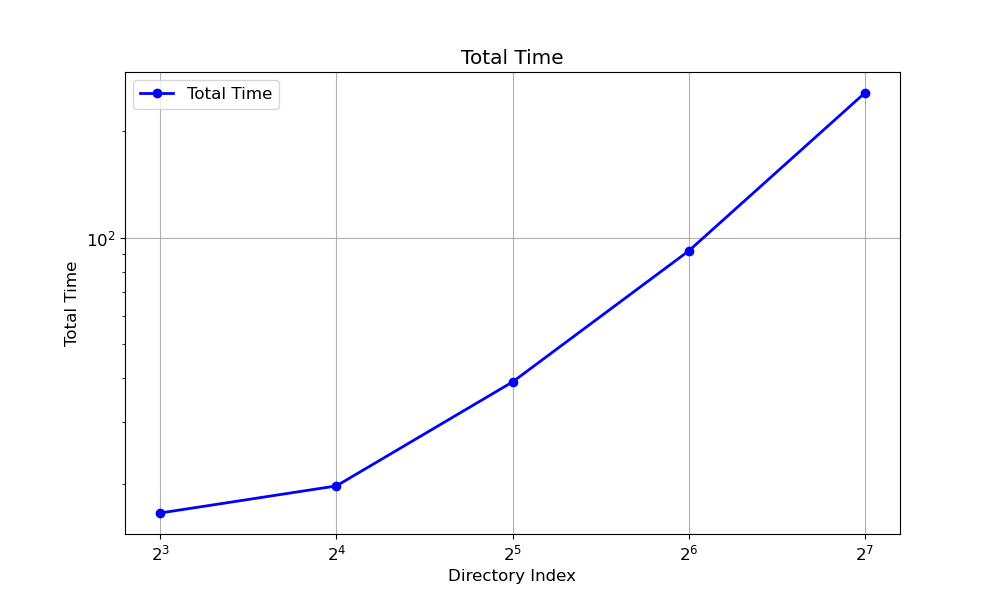

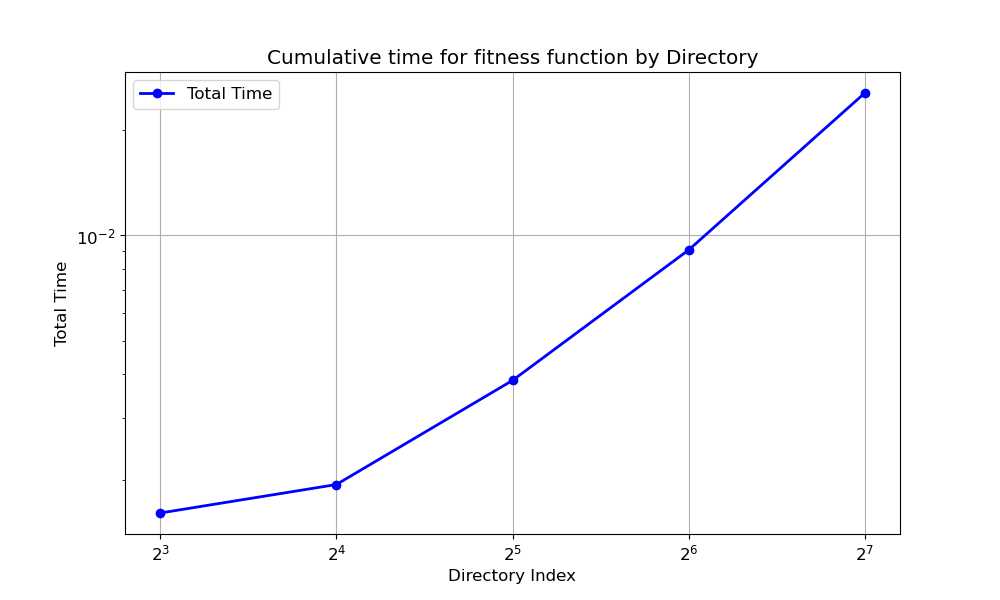

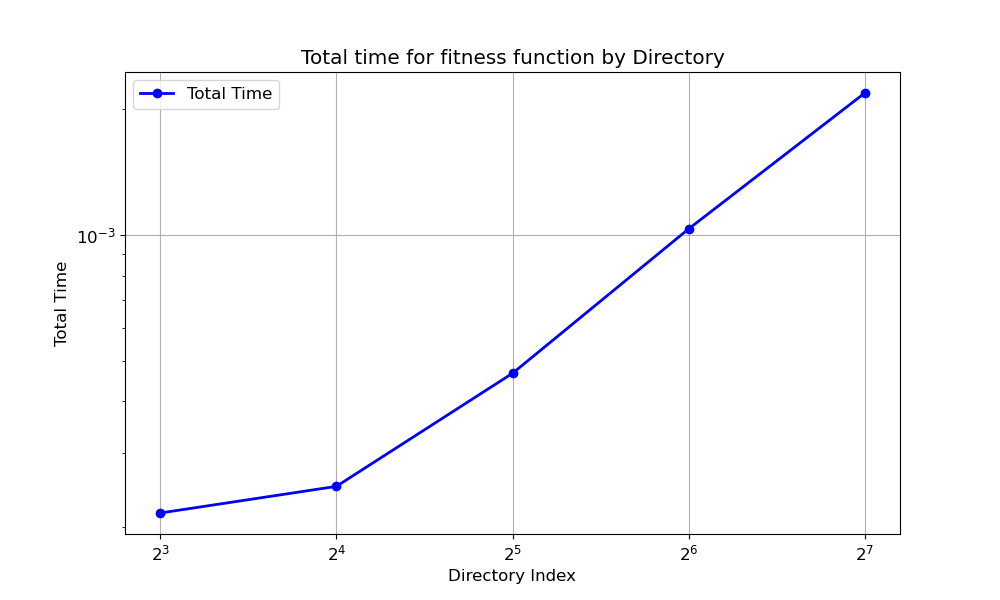

In [ ]:
 dimensions = [8,16,32,64,128]

# Define the parent directory containing subdirectories
parent_dir = "stats_001"

# List subdirectories (sorted to maintain order)
directories = [f"n{d}_profiling_001" for d in dimensions]
print(directories)

# Initialize data structures to hold stats
cumulative_times = []
total_times = []
indexes = []
cumulative_times_fitness = []
total_times_fitness = []
# Process each directory
for idx, directory in enumerate(directories):
    dir_path = os.path.join(parent_dir, directory)
    prof_files = [f for f in os.listdir(dir_path) if f.endswith(".prof")]
    if len(prof_files) != 1:
        print(f"Skipping {directory}: expected one .prof file, found {len(prof_files)}.")
        continue

    prof_file = os.path.join(dir_path, prof_files[0])
    
    # Load profile stats
    stats = pstats.Stats(prof_file)
    total_time = stats.total_tt    # Total number of calls as a proxy for total time
    ncalls = stats.total_calls  
  # Total number of calls as a proxy for total time
    
    # Store results
    indexes.append(idx)
    total_times.append(total_time)

    # Get fitness function stats
 

    function_names = [func for func in stats.stats.keys() if "reward_based_fitness" in func[2]]
    func_stats = stats.stats[function_names[0]]
    ncalls, nprimitive, total_time, cumulative_time, callers = func_stats
    cumulative_times_fitness.append(cumulative_time/ncalls)
    total_times_fitness.append(total_time/ncalls)
    

# # Plot cumulative time
# plt.figure(figsize=(10, 6))
# plt.plot(dimensions, cumulative_times, marker="o", label="Cumulative Time")
# plt.xlabel("Directory Index")
# plt.ylabel("Cumulative Time")
# plt.title("Cumulative Time by Directory")
# plt.grid()
# plt.legend()
# plt.show()

# Plot total time
plt.figure(figsize=(10, 6))
plt.plot(dimensions, total_times, marker="o", label="Total Time")
plt.xlabel("Directory Index")
plt.ylabel("Total Time")
plt.title("Total Time")
plt.grid()
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.legend()
plt.show()

# Plot total time
plt.figure(figsize=(10, 6))
plt.plot(dimensions, cumulative_times_fitness, marker="o", label="Total Time")
plt.xlabel("Directory Index")
plt.ylabel("Total Time")
plt.title("Cumulative time for fitness function by Directory")
plt.grid()
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.legend()
plt.show()

# Plot total time
plt.figure(figsize=(10, 6))
plt.plot(dimensions, total_times_fitness, marker="o", label="Total Time")
plt.xlabel("Directory Index")
plt.ylabel("Total Time")
plt.title("Total time for fitness function by Directory")
plt.grid()
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.legend()
plt.show()



In [3]:
stats.print_stats()    

Wed Jan 22 17:18:24 2025    stats_001/n128_profiling_001/profile_results.prof

         286768145 function calls (280368141 primitive calls) in 256.898 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <frozen _collections_abc>:315(__subclasshook__)
      3/1    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
     4628    0.001    0.000    0.003    0.000 <frozen abc>:117(__instancecheck__)
     4628    0.001    0.000    0.001    0.000 {built-in method _abc._abc_instancecheck}
      3/1    0.000    0.000    0.000    0.000 {built-in method _abc._abc_subclasscheck}
       80    0.005    0.000    0.005    0.000 {built-in method time.sleep}
       59    0.000    0.000    0.000    0.000 {method 'acquire' of '_thread.RLock' objects}
       59    0.000    0.000    0.000    0.000 {method 'release' of '_thread.RLock' objects}
       80    0.000    0.000    0.000    

In [4]:
for func, func_stats in stats.stats.items():
    if "implement_array_function" in func[2]:
        ncalls, nprimitive, total_time, cumulative_time, callers = func_stats

        print(f"Function: {func}")
        print(f"Number of calls: {ncalls}")
        print(f"Primitive calls: {nprimitive}")
        print(f"Total time (self time): {total_time:.6f} seconds")
        print(f"Cumulative time: {cumulative_time:.6f} seconds")
        print(f"Callers: {callers}")
    

Function: ('~', 0, '<built-in method numpy.core._multiarray_umath.implement_array_function>')
Number of calls: 31819679
Primitive calls: 31819679
Total time (self time): 118.095256 seconds
Cumulative time: 151.662147 seconds
Callers: {('<__array_function__ internals>', 177, 'squeeze'): (6348800, 6348800, 2.20985996, 6.043658735), ('<__array_function__ internals>', 177, 'shape'): (10000, 10000, 0.004711512, 0.008097672), ('<__array_function__ internals>', 177, 'amax'): (270, 270, 0.00021712900000000001, 0.004325142000000001), ('<__array_function__ internals>', 177, 'amin'): (80, 80, 5.1101000000000004e-05, 0.00053303), ('<__array_function__ internals>', 177, 'prod'): (9299, 9299, 0.003448623, 0.058386197), ('<__array_function__ internals>', 177, 'real'): (6400000, 6400000, 5.747452033, 7.7556947240000005), ('<__array_function__ internals>', 177, 'dot'): (6348800, 6348800, 105.216603066, 108.425799982), ('<__array_function__ internals>', 177, 'transpose'): (12697600, 12697600, 4.90841297

In [1]:
print(14.584+2.731)

17.314999999999998
